## Resume Classification


## 1. Import Library

In [4]:
import os
import re
import nltk
import spacy
import string
import textract
import docx2txt
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt
import nltk
nltk.download('stopwords')
from pdf2docx import Converter

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rajeshvar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. About Dataset

In [5]:
file_path   = r'/home/rajeshvar/Documents/Project-Resume-Classification-main/Dataset/Resumes/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [6]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 53


In [7]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  80


### 2.1 Type of File Format

In [8]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

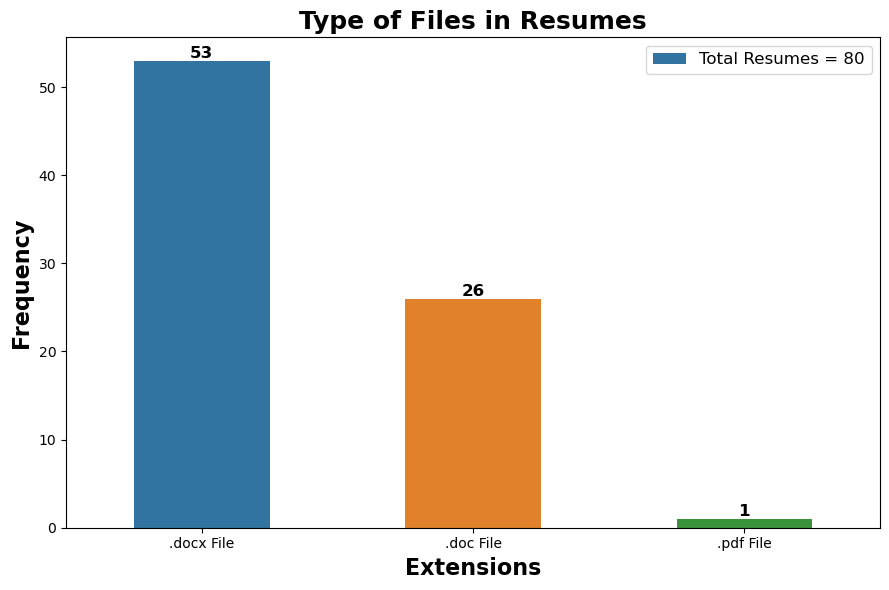

In [9]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('./Dataset/IMG/File_Type_Bar', dpi = 500)

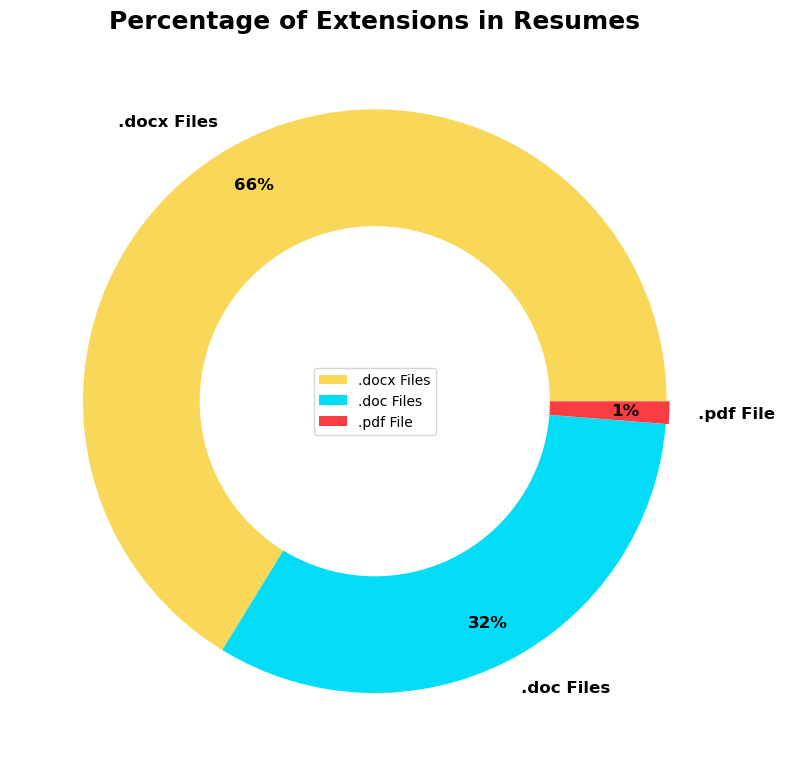

In [10]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85, 
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('./Dataset/IMG/Per_File_Pai', dpi = 500)

In [11]:
path_input = r'./Dataset/Resumes/React JS Developer'
path_output = r'./Dataset/Resumes/React JS Developer'
for file in os.listdir(path_input):
    if file.endswith('.pdf'):
        final = os.path.join(path_input, file)
        cv = Converter(final)
        basename = os.path.splitext(file)[0]
        print(basename)
        cv.convert(path_output + '/' + basename+'.docx', start=0, end=None)
        cv.close()
     

[INFO] Start to convert ./Dataset/Resumes/React JS Developer/React JS Developer_Prabakaran_Musquare.pdf
[INFO] [1/4] Opening document...
[INFO] [2/4] Analyzing document...


React JS Developer_Prabakaran_Musquare


[INFO] [3/4] Parsing pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] [4/4] Creating pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] Terminated in 0.50s.


## 3. Extract Resumes by Profile Category

In [12]:
file_path = r'/home/rajeshvar/Documents/Project-Resume-Classification-main/Dataset/Resumes/'
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [13]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,PeopleSoft,Peoplesoft Admin_SirazuddinMohammad.docx
1,PeopleSoft,Peoplesoft FSCM_HariNarayana.docx
2,PeopleSoft,Peoplesoft Finance_Pritam Biswas.doc
3,PeopleSoft,PeopleSoft DBA_Ganesh Alladi.doc
4,PeopleSoft,Peoplesoft Admin_Varkala Vikas.docx
...,...,...
75,Workday,J. Sumanth Royal_Hexaware.doc
76,Workday,Punugoti Swetha_Hexaware.doc
77,Workday,Sri Krishna S_Hexaware.doc
78,Workday,Harikrishna Akula_Hexaware.doc


In [14]:
resume_data.Profile.value_counts().index

Index(['React JS Developer', 'Workday', 'PeopleSoft', 'SQL Developer'], dtype='object')

In [15]:
resume_data.Profile.value_counts()

React JS Developer    25
Workday               21
PeopleSoft            20
SQL Developer         14
Name: Profile, dtype: int64

### 3.1 Number of Total Resumes

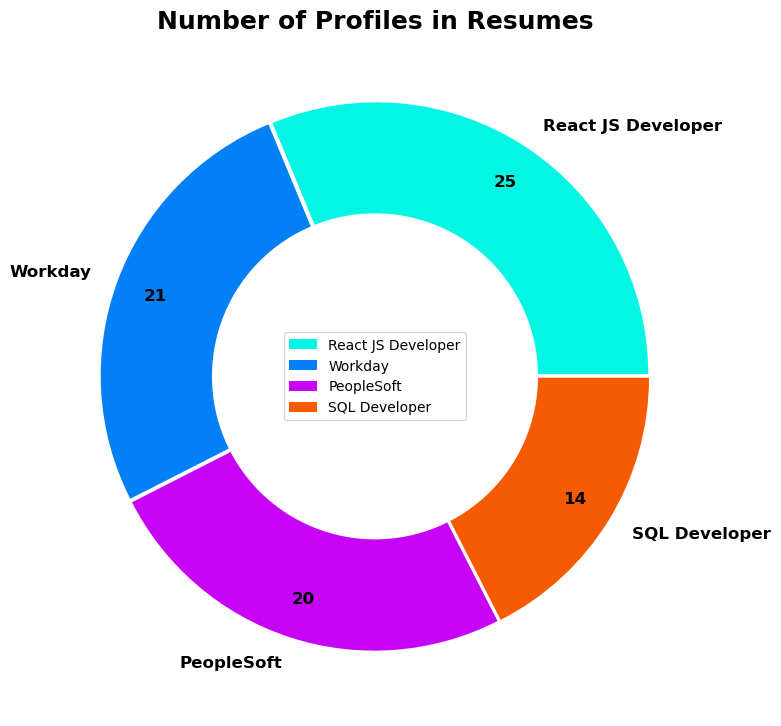

In [16]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('/home/rajeshvar/Documents/Project-Resume-Classification-main/No_Resume_Pai', dpi = 500)

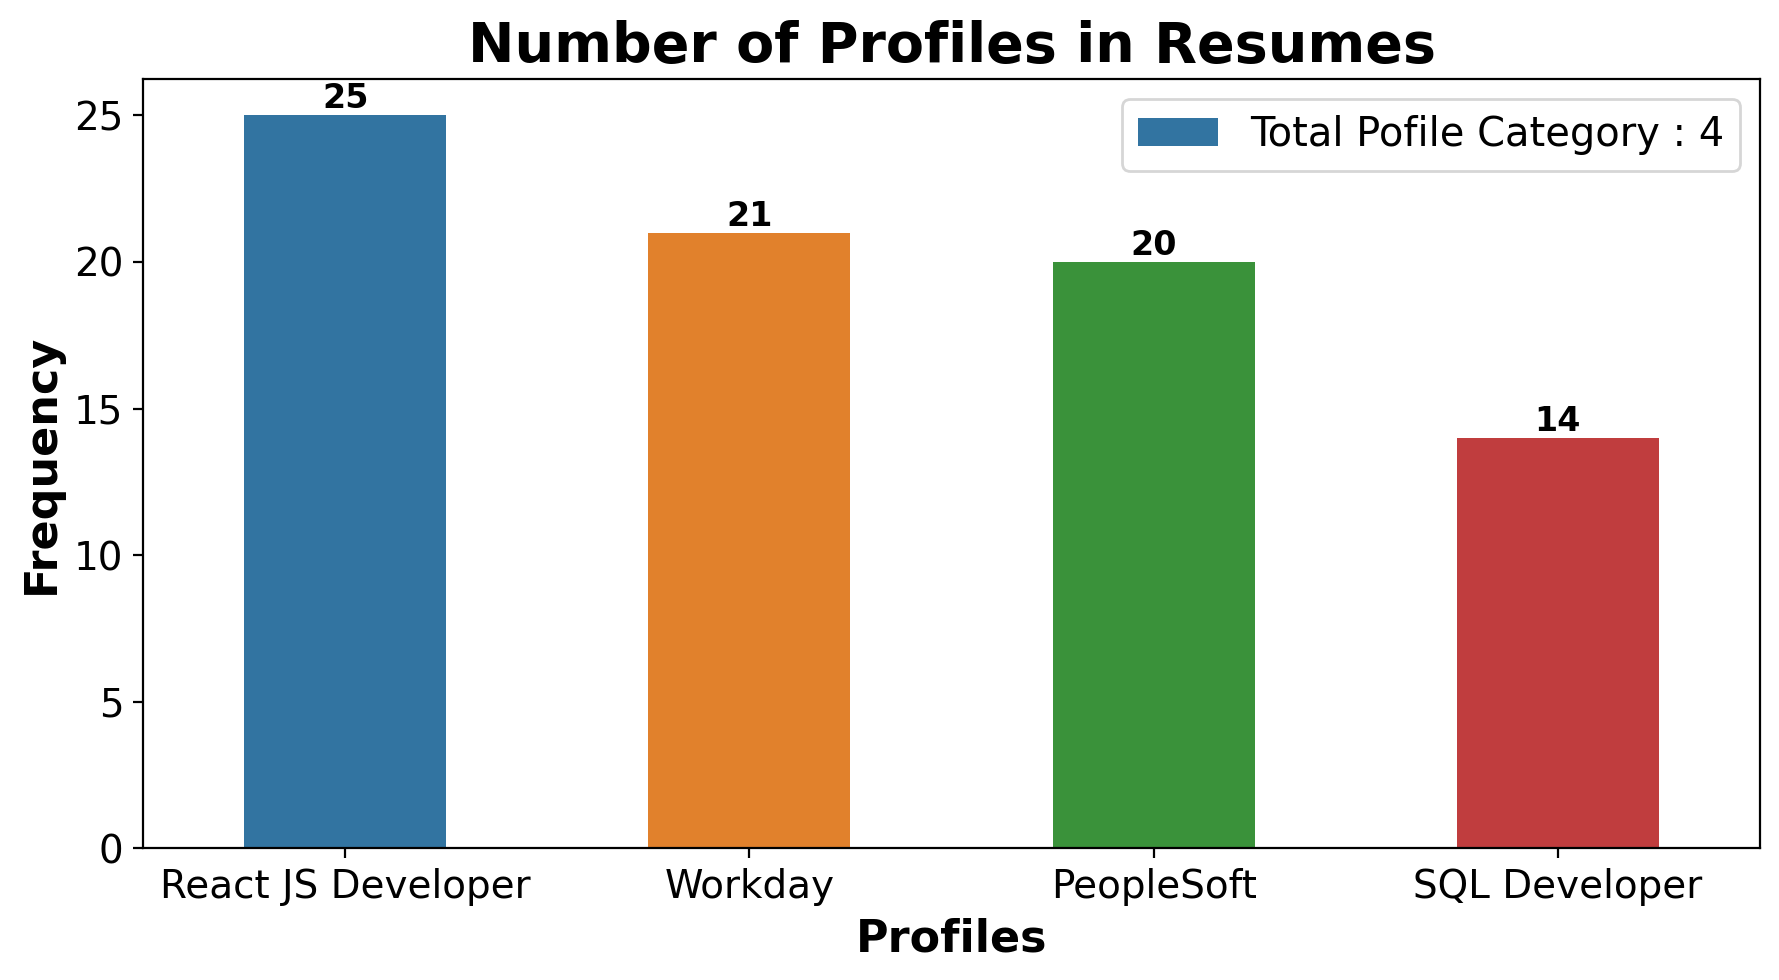

In [17]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(), width=0.5,
                 data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('/home/rajeshvar/Documents/Project-Resume-Classification-main/No_Resume_Bar', dpi = 500)

### Percentage of Profiles Category

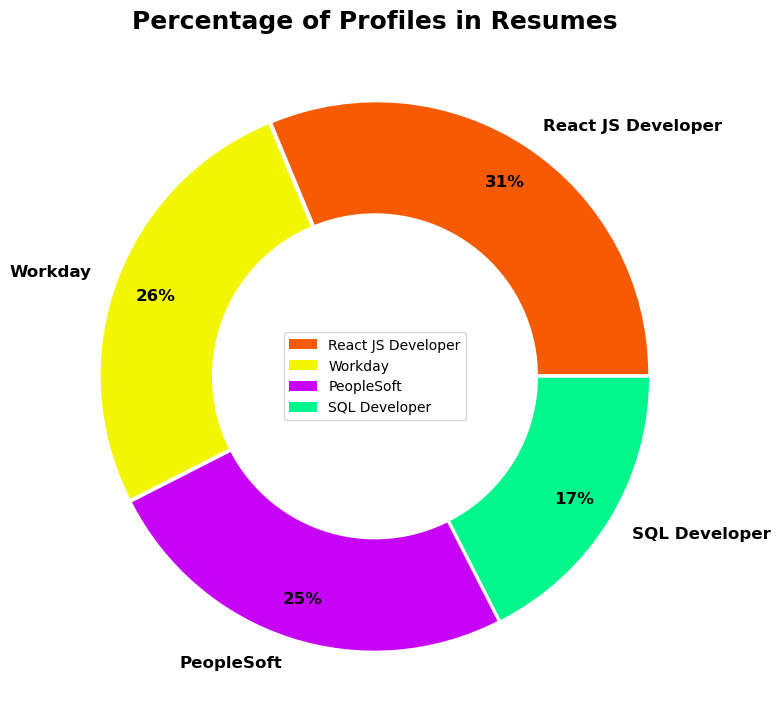

In [18]:
fig = plt.figure(figsize=(8,8),dpi=100) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('/home/rajeshvar/Documents/Project-Resume-Classification-main/Per_Cat_Pai', dpi = 500)

## 4. Reading a Resume File

In [19]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx('/home/rajeshvar/Documents/Project-Resume-Classification-main/Dataset/Resumes/React JS Developer/React Developer_Haripriya.docx'))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

# Pre-processing
### Exctract the Text from Dataset

In [20]:
# try to extract all folder one time

file_name = []
category = []
base_dir = '/home/rajeshvar/Documents/Project-Resume-Classification-main/Dataset/Resumes/'
for root, dirs, files in os.walk(base_dir, topdown=False):
    for name in files:
        if name.endswith(".docx"):
            file_path = os.path.join(root, name)
            file_name.append(file_path)

In [21]:
file_path1 = []
category1  = []
directory1 = './Dataset/Resumes/PeopleSoft/'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [22]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
5,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
6,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft
7,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
8,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
9,Classification: Internal\n\nClassification: In...,PeopleSoft


In [23]:
file_path2 = []
category2  = []
directory2 = './Dataset/Resumes/React JS Developer/'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [24]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer
2,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
3,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
5,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer
6,Name: M. Prabakaran \nTitle: UI Developer\n\nP...,React JS Developer
7,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
8,Name: Ravali P \n\n\n\n ...,React JS Developer
9,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer


In [25]:
file_path3 = []
category3  = []
directory3 = './Dataset/Resumes/SQL Developer/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [26]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,BUDDHA VAMSI ...,SQL Developer
1,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer
2,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
3,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
4,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
5,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
6,KAMBALLA PRADEEP ...,SQL Developer
7,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
8,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer


In [27]:
file_path4 = []
category4  = []
directory4 = './Dataset/Resumes/Workday/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [28]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
1,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday
2,G Himaja\n\n ...,Workday
3,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
4,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
5,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
6,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
7,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday
8,Workday HCM Techno functional Consultant ...,Workday
9,Vinay kumar .v\nWorkday Functional Consultant\...,Workday


### Merging & Create dataframe

In [29]:
resume_data = data1.append([data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN
5,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
6,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN
7,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
8,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN
9,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN


In [30]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  53 non-null     object
 1   Category1    10 non-null     object
 2   Category2    21 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


## Final Dataset

In [31]:
resume_data['Category'] = category1 + category2 + category3 + category4

resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]
resume_data.head(15)

,Category,Raw_Details
0,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
1,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
2,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
3,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
4,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
5,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
6,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
7,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
8,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
9,PeopleSoft,Classification: Internal\n\nClassification: In...


### Save to csv file

In [32]:
resume_data.to_csv('Raw_Resume.csv', index=False)

### Data understanding

In [33]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
42,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
43,Workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
44,Workday,G Himaja\n\n ...
45,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
46,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
47,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
48,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
49,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
50,Workday,Workday HCM Techno functional Consultant ...
51,Workday,Vinay kumar .v\nWorkday Functional Consultant\...


In [34]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

### No. of words in each resumes

In [35]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,448
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433


### No. of characters in each resumes

In [36]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",3800
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,3714
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,7943
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,2852
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,3669


### No. of stopword in each resumes

In [37]:

stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,88
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,98
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,84


### No. of numerics in each resumes

In [38]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",15
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,13
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,4
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,4
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,13


In [39]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15
1,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
2,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
3,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
4,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
5,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
6,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8
7,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
8,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540,3577,136,3
9,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7


## Text Pre-processing

In [40]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [41]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

In [42]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
1,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
2,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
3,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
5,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
6,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...
7,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
8,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...
9,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...


#### Save cleaned data to new csv file

In [43]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
1,PeopleSoft,hari narayana professional summary years exper...
2,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
3,PeopleSoft,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,murali professional summary years experience p...
5,PeopleSoft,anubhav kumar singh core competencies scriptin...
6,PeopleSoft,address manyata tech park nagavara bangalore l...
7,PeopleSoft,peoplesoft administration vivekanand sayana ca...
8,PeopleSoft,priyabrata hota career objective pursuing peop...
9,PeopleSoft,classification internal classification interna...


In [44]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
1,PeopleSoft,hari narayana professional summary years exper...
2,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
3,PeopleSoft,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,murali professional summary years experience p...
5,PeopleSoft,anubhav kumar singh core competencies scriptin...
6,PeopleSoft,address manyata tech park nagavara bangalore l...
7,PeopleSoft,peoplesoft administration vivekanand sayana ca...
8,PeopleSoft,priyabrata hota career objective pursuing peop...
9,PeopleSoft,classification internal classification interna...


In [45]:
resume_data.Resume_Details[5]

'anubhav kumar singh core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steady paced professional growth professional experience current hcl current role system admin offshore skills shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environments along support environments installed linux windows involved day day activities project migration database refresh system admin changes tax updates etc troubleshooting various servers like application servers web servers process scheduler servers applying tuxedo weblogic middleware cpu patche

## Tokenization (Named Entity Recognition (NER))

In [46]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 334), ('using', 259), ('workday', 232), ('sql', 213), ('application', 209), ('project', 192), ('server', 188), ('data', 180), ('reports', 170), ('peoplesoft', 169), ('business', 165), ('web', 145), ('knowledge', 137), ('react', 135), ('process', 123), ('skills', 120), ('system', 117), ('client', 109), ('good', 108), ('tools', 102), ('involved', 102), ('working', 101), ('database', 99), ('developer', 99), ('creating', 97), ('various', 97), ('like', 97), ('hcm', 94), ('support', 94), ('development', 94), ('worked', 93), ('integrations', 92), ('technical', 89), ('services', 89), ('integration', 87), ('servers', 86), ('report', 83), ('html', 83), ('people', 81), ('design', 81), ('created', 81), ('role', 80), ('team', 78), ('used', 77), ('responsibilities', 72), ('studio', 72), ('work', 71), ('professional', 71), ('css', 71), ('eib', 71)]


## 7. Parts Of Speech (POS) Tagging

In [47]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [48]:
for token in doc_block[:30]:
    print(token,token.pos_)  

t NOUN
name NOUN
role NOUN
environment PROPN
cio PROPN
common ADJ
software NOUN
engineer NOUN
solaris PROPN
windows PROPN
server NOUN
responsibilities NOUN
provided VERB
administrative ADJ
supports NOUN
peoplesoft ADJ
tools NOUN
version NOUN
application NOUN
hrms NOUN
financials NOUN
scm PROPN
modules VERB
windows NOUN
unix NOUN
creation NOUN
indexes NOUN
tables NOUN
application NOUN
designer NOUN


### 7.1 Filtering out only the Nouns and Verbs from the Text to Tokens

In [49]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['years', 'experience', 'administrator', 'installed', 'peopletools', 'scratch', 'including', 'products', 'experience', 'peopletools', 'application', 'hrms', 'approach', 'problem', 'solving', 'troubleshooting', 'integration', 'broker', 'upgraded', 'applications', 'peopletools', 'peopletools', 'education', 'graduated', 'tech', 'electronics', 'communication', 'achieved', 'marks', 'scored', 'achievements', 'awarded', 'pat', 'awarded', 'month', 'award', 'month', 'time', 'awarded', 'spot', 'production', 'support', 'finance', 'environment', 'non', 'production', 'environments', 'project', 'experience', 'project', 'name', 'role', 'consultant', 'environment', 'windows', 'server', 'technol', 'ogy', 'ions', 'insurance', 'client', 'project', 'deals', 'support', 'managing', 'finance', 'applications', 'project', 'experience', 'project', 'name', 'financials', 'role', 'associate', 'environment', 'windows', 'implemented', 'fin', 'application', 'implementation', 'project', 'includes', 'applications', 'in

### 7.2 Counting all the Nouns and Verbs present in the Tokens of words

In [50]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,302
1,using,249
2,application,208
3,workday,193
4,project,174
5,data,170
6,reports,170
7,business,157
8,web,140
9,react,135


### 7.3 Visualizing the Result of Top 20 Nouns and Verbs most Frequently

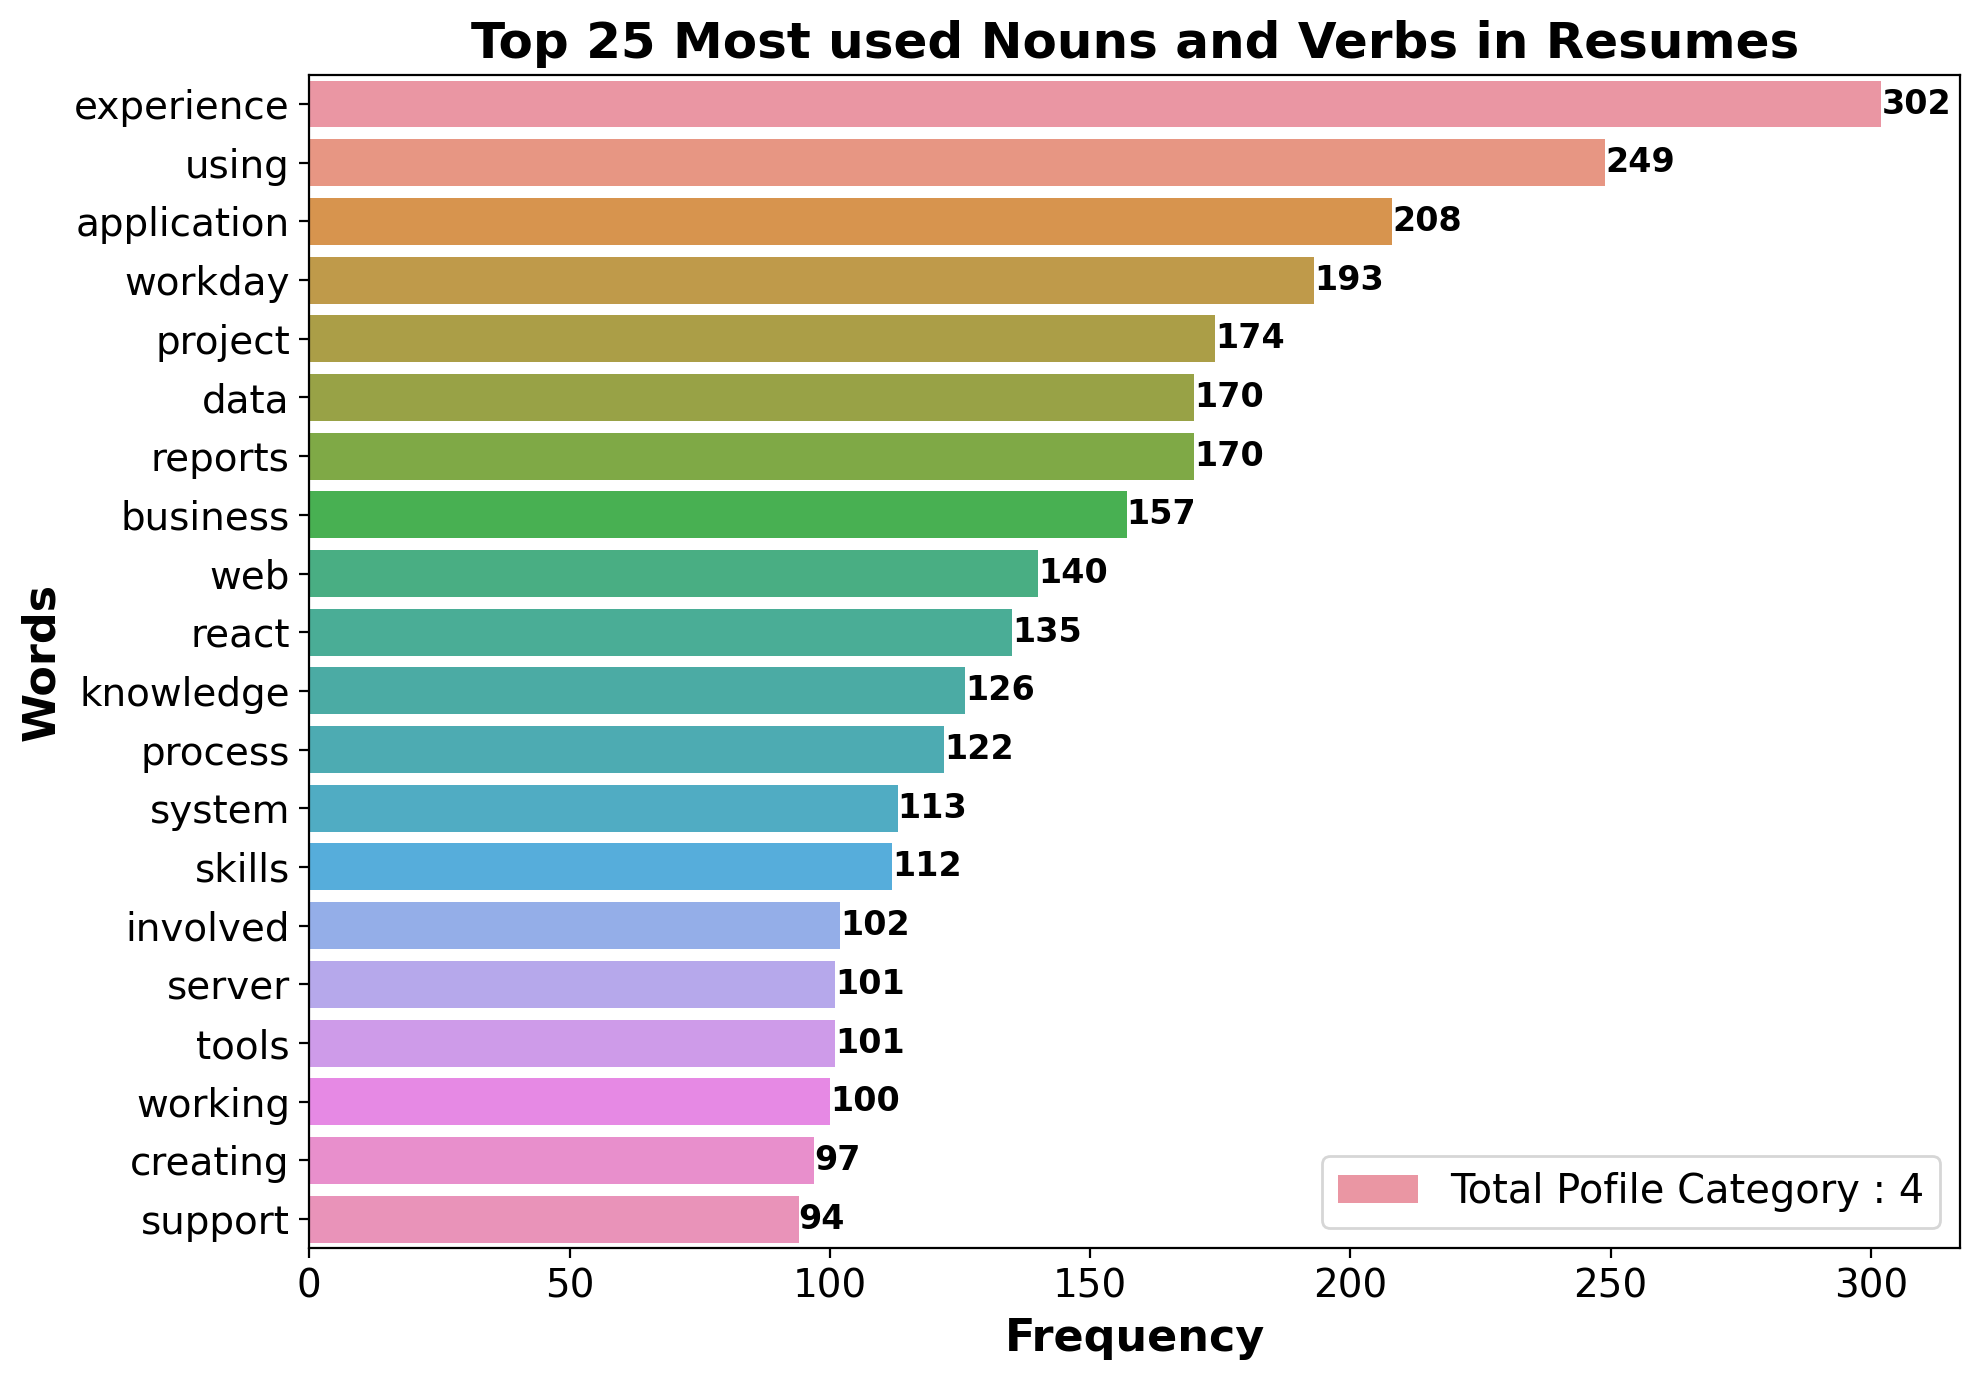

In [51]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()

fig.savefig('/home/rajeshvar/Documents/Project-Resume-Classification-main/Dataset/IMG/Top_Nouns_Verbs_Bar', dpi = 200)
plt.show()

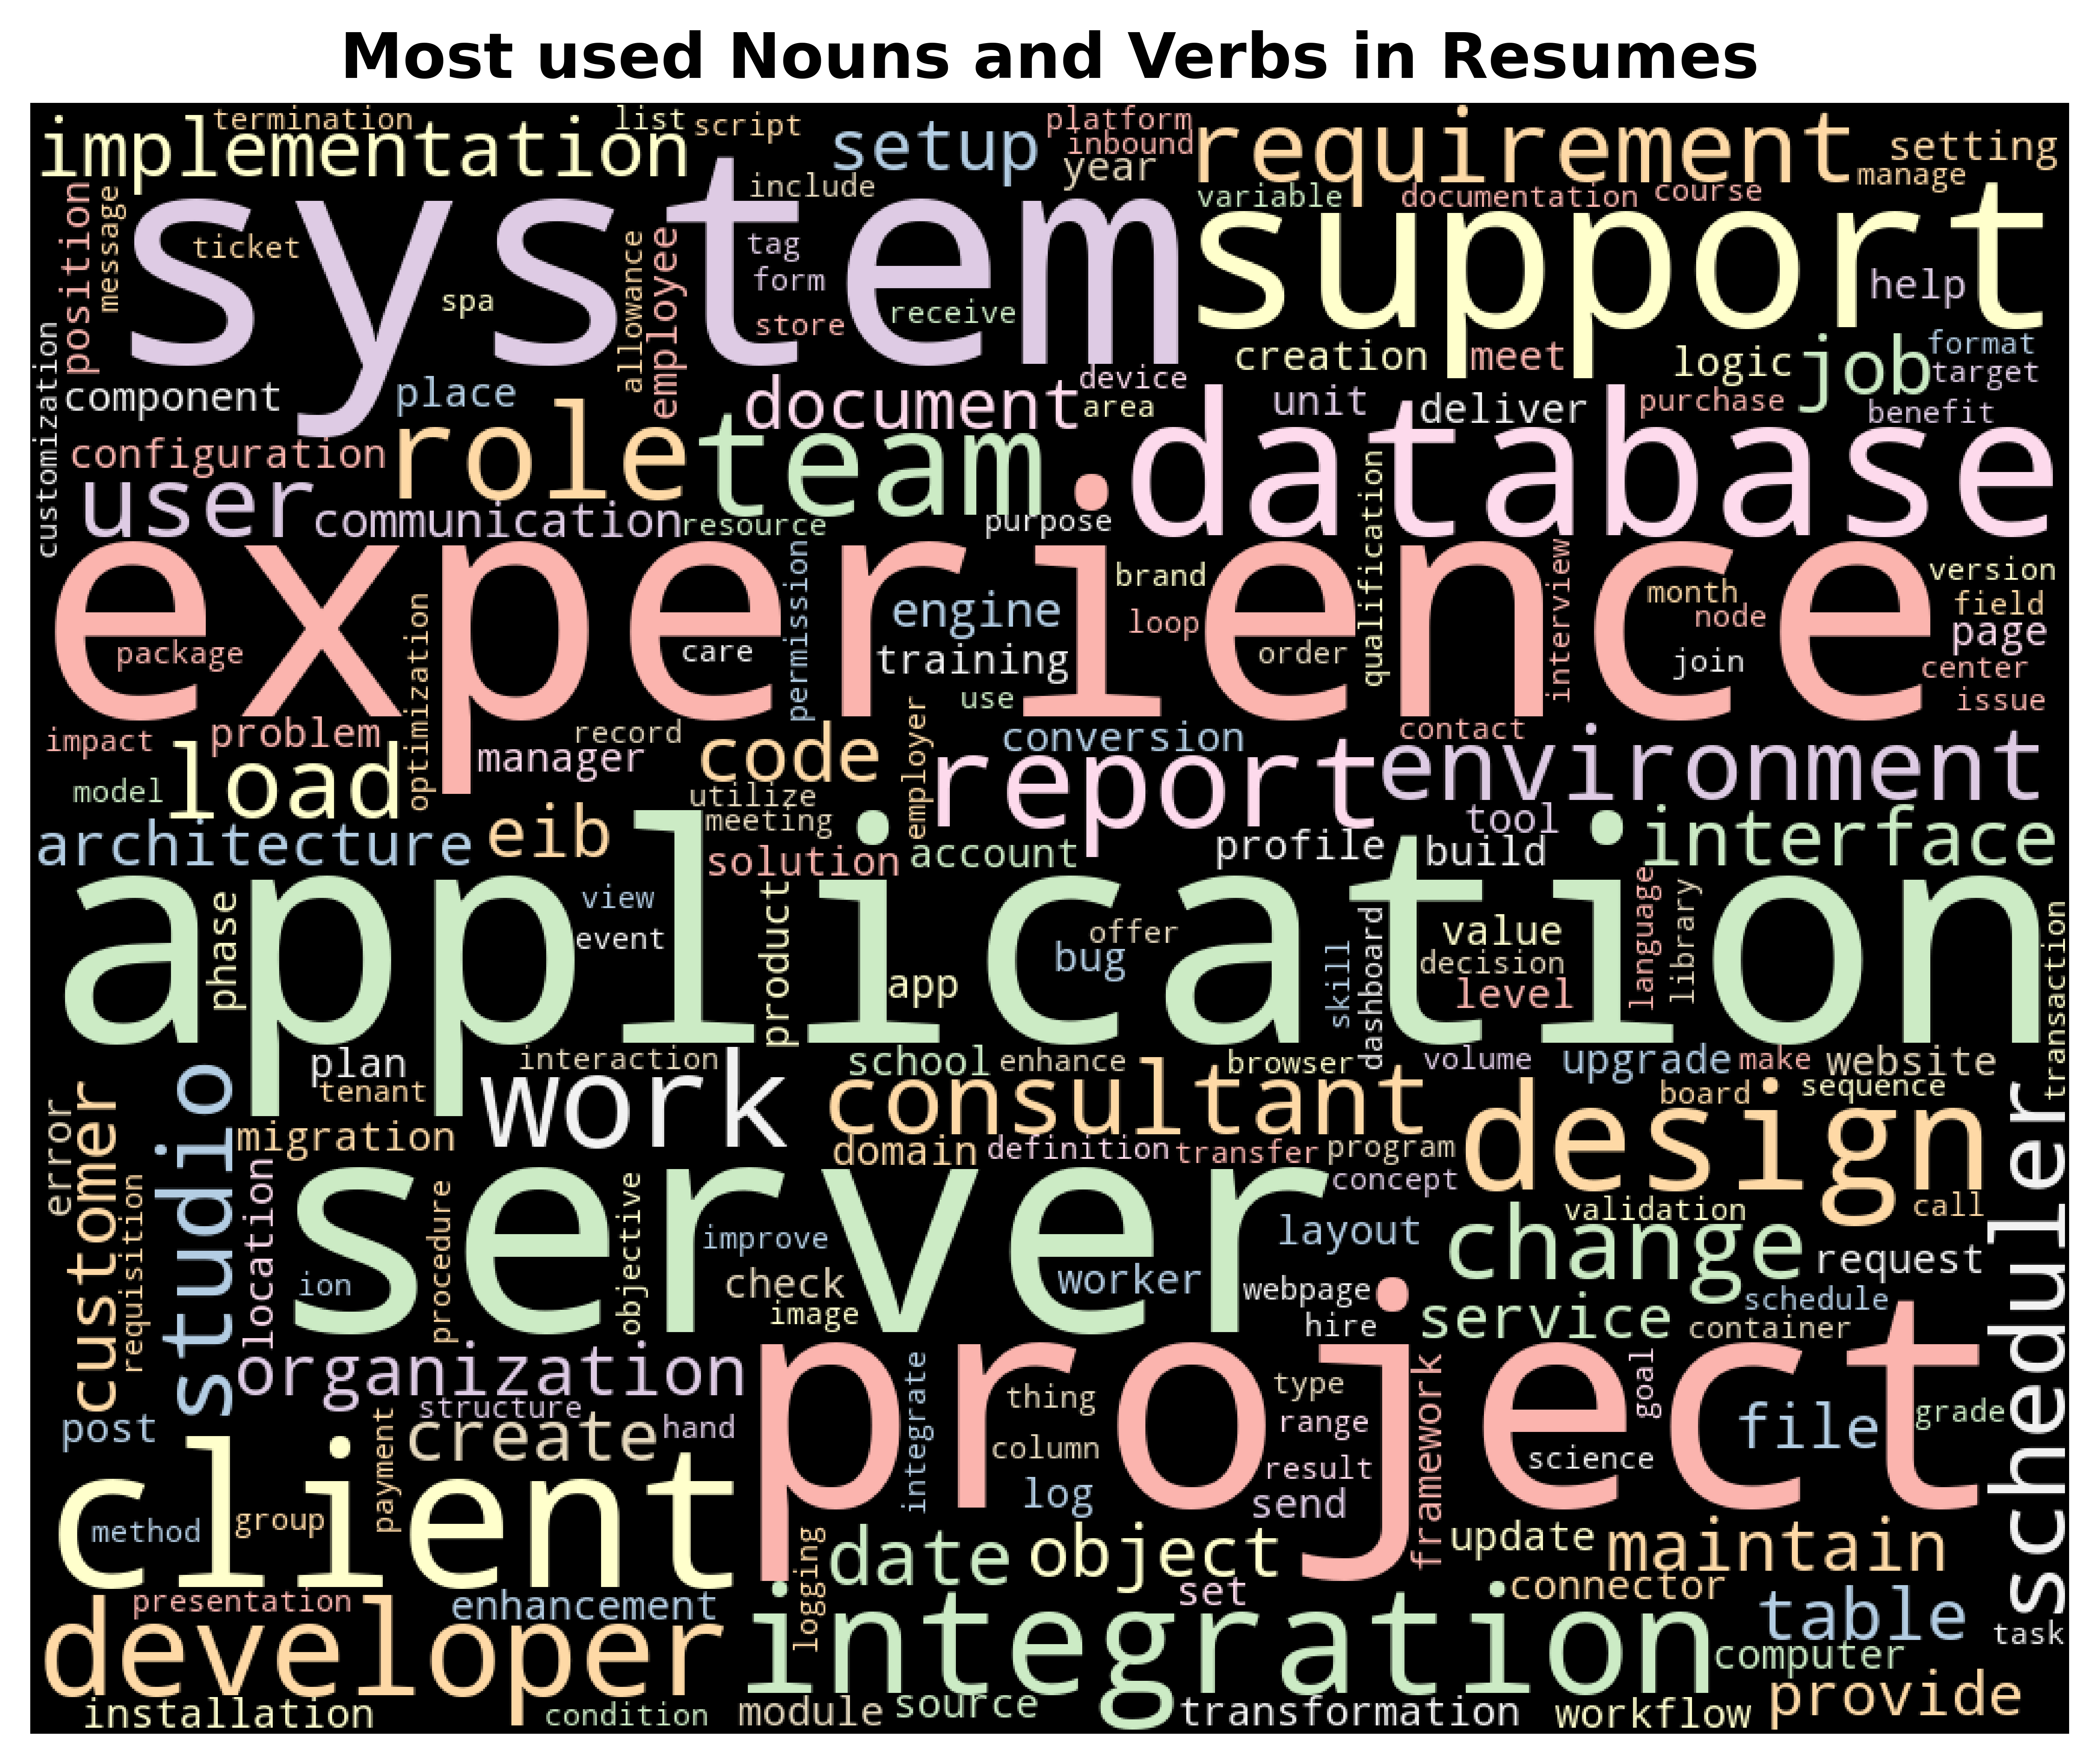

In [52]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('./Dataset/IMG/Word_Clowds_Noun_Verb.png')
plt.show()

# Model Building